# HW3

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sea
from scipy.integrate import odeint
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

$\frac{F(t)}{F_0} = 1 - \frac{A_E(t)}{\pi R_*^2}$

$A_E \approx R_p^2 \arccos[\frac {x}{R_p}] - R_p x \sqrt{1-\frac{x^2}{R_p^2}}$

$x =d-R_*$

$d(t) = a \sqrt{\sin ^2 (\omega t) + \cos (i) \cos^2 (\omega t)}$

In [93]:
m_e = 5.9721986E24 # kilograms
m_j = 1.89813E27 # kilograms
AU= 1.496E11 # m
R_star = 695700E3 #m
r_e = 6371.008E3 # m
r_j = 69911E3 # m
A_star = np.pi*R_star**2
theta=np.linspace(-.03*np.pi,.03*np.pi,10000)


def Relative_flux(r,m,a,i,Theta = theta):
    C = np.pi/180.
    d=a * np.sqrt(np.sin(Theta)**2 + np.cos(i*C)*np.cos(Theta)**2)
    x=d-R_star
    
    A = np.zeros(d.size)
    for u in range(d.size):
        if x[u] <= r:
            if x[u] < -r:
                A[u] = np.pi*r**2
            else:
                A[u]=(r**2)*np.arccos(x[u]/r) - r*x[u]*np.sqrt(1-(x[u]/r)**2)
        
    return 1 - A / (A_star)

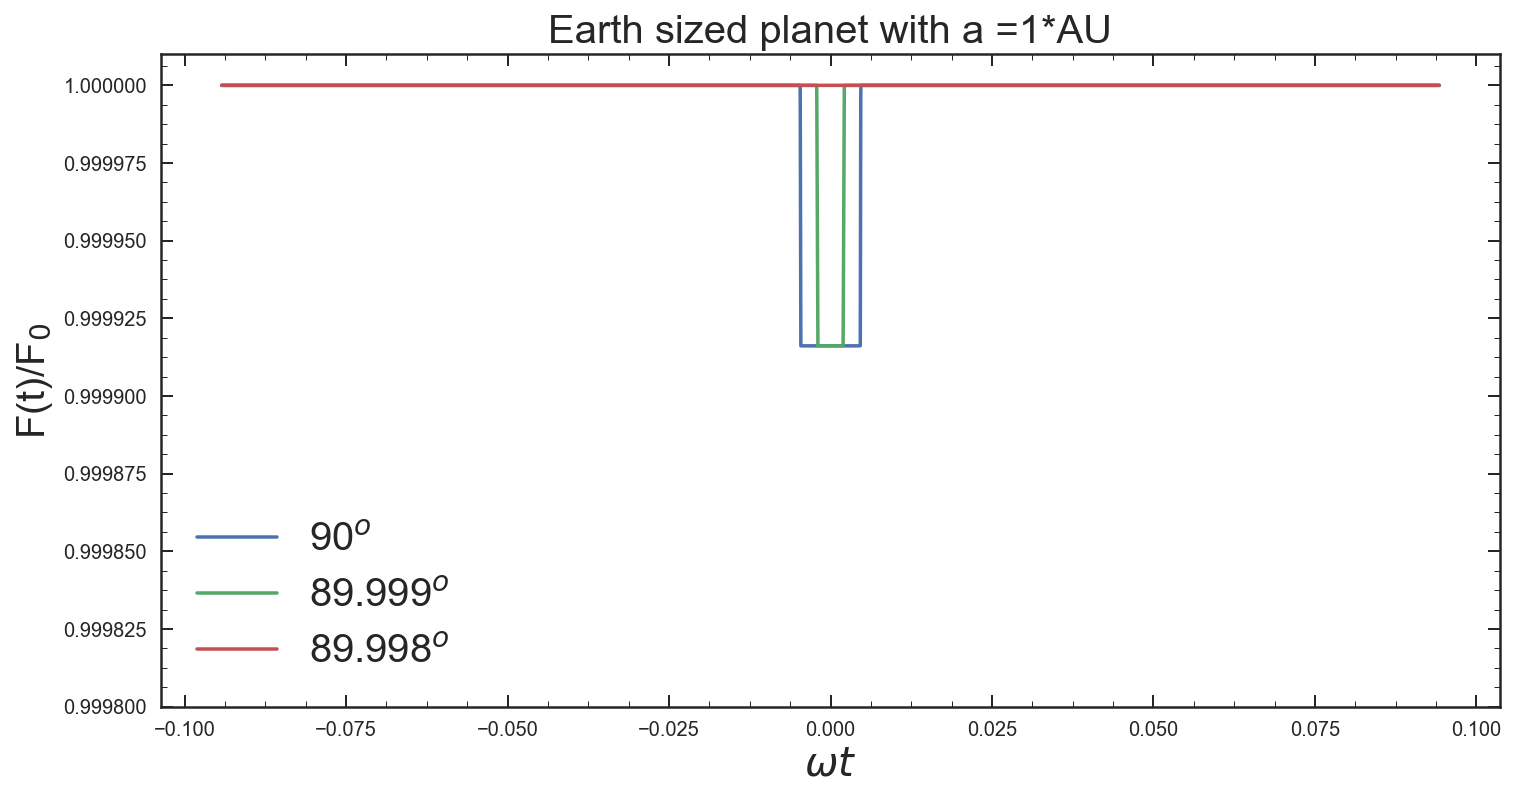

In [94]:
plt.figure(figsize=[12,6])
plt.plot(theta,Relative_flux(r_e,m_e,AU,90.),label = '90$^o$')
plt.plot(theta,Relative_flux(r_e,m_e,AU,89.999),label = '89.999$^o$')
plt.plot(theta,Relative_flux(r_e,m_e,AU,89.998),label = '89.998$^o$')
plt.ylim(0.9998,1.00001)
plt.xlabel('$\omega t$',fontsize=20)
plt.ylabel('F(t)/F$_0$',fontsize=20)
plt.title('Earth sized planet with a =1*AU',fontsize=20)
plt.legend(fontsize=20)

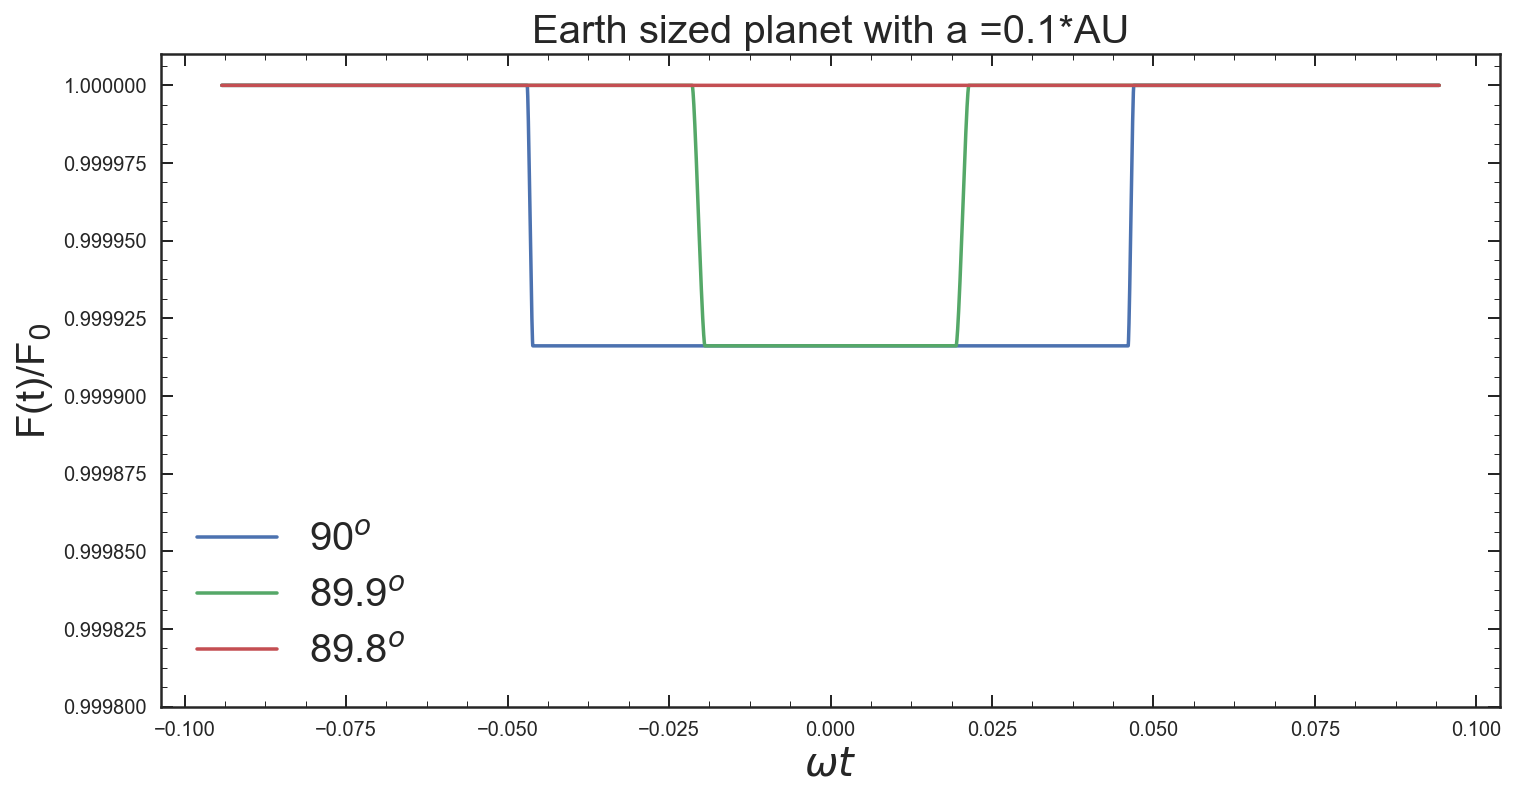

In [95]:
plt.figure(figsize=[12,6])
plt.plot(theta,Relative_flux(r_e,m_e,AU*.1,90.),label = '90$^o$')
plt.plot(theta,Relative_flux(r_e,m_e,AU*.1,89.9),label = '89.9$^o$')
plt.plot(theta,Relative_flux(r_e,m_e,AU*.1,89.8),label = '89.8$^o$')
plt.ylim(0.9998,1.00001)
plt.xlabel('$\omega t$',fontsize=20)
plt.ylabel('F(t)/F$_0$',fontsize=20)
plt.title('Earth sized planet with a =0.1*AU',fontsize=20)
plt.legend(fontsize=20)

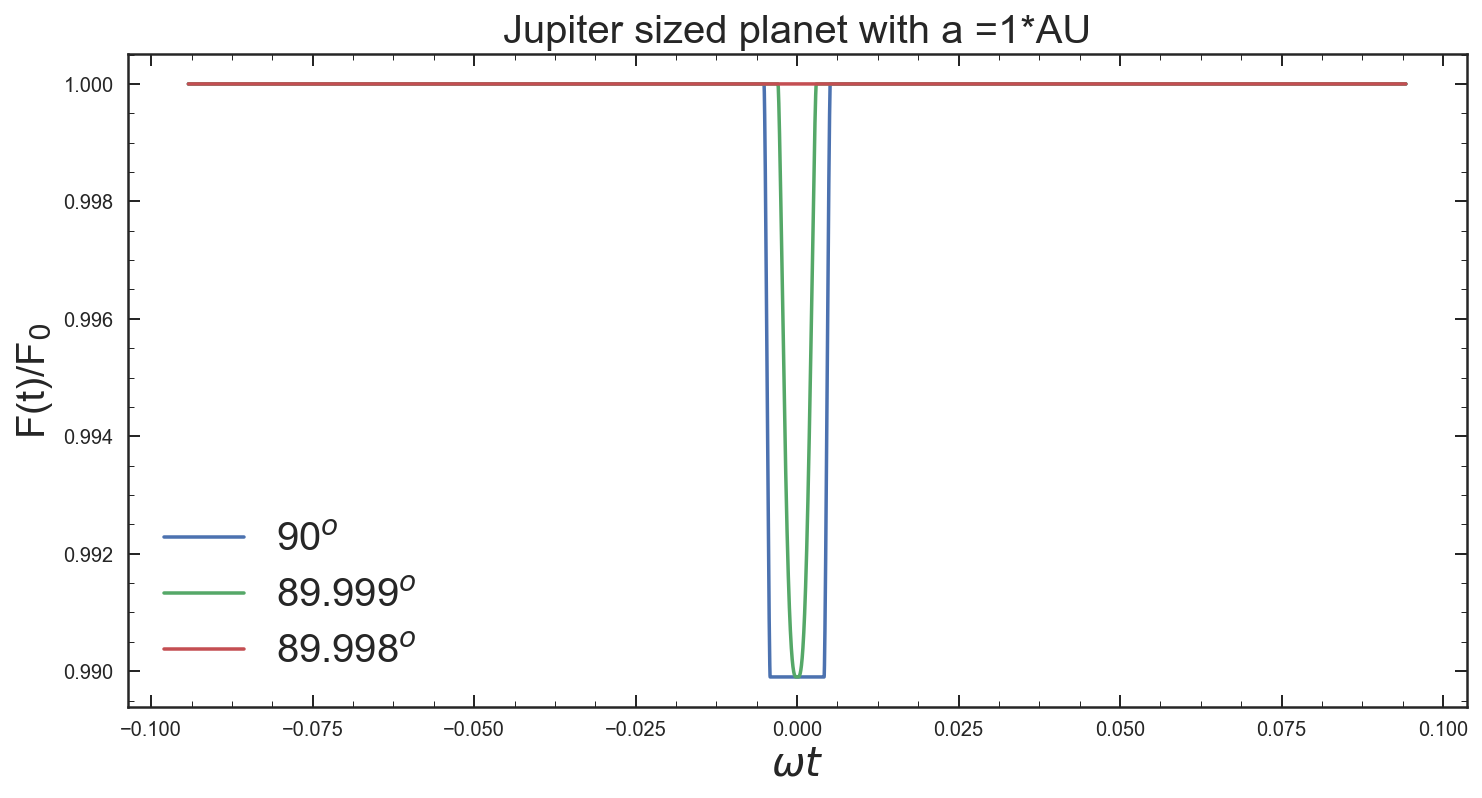

In [96]:
plt.figure(figsize=[12,6])
plt.plot(theta,Relative_flux(r_j,m_j,AU,90.),label = '90$^o$')
plt.plot(theta,Relative_flux(r_j,m_j,AU,89.999),label = '89.999$^o$')
plt.plot(theta,Relative_flux(r_j,m_j,AU,89.998),label = '89.998$^o$')
plt.xlabel('$\omega t$',fontsize=20)
plt.ylabel('F(t)/F$_0$',fontsize=20)
plt.title('Jupiter sized planet with a =1*AU',fontsize=20)
plt.legend(fontsize=20)

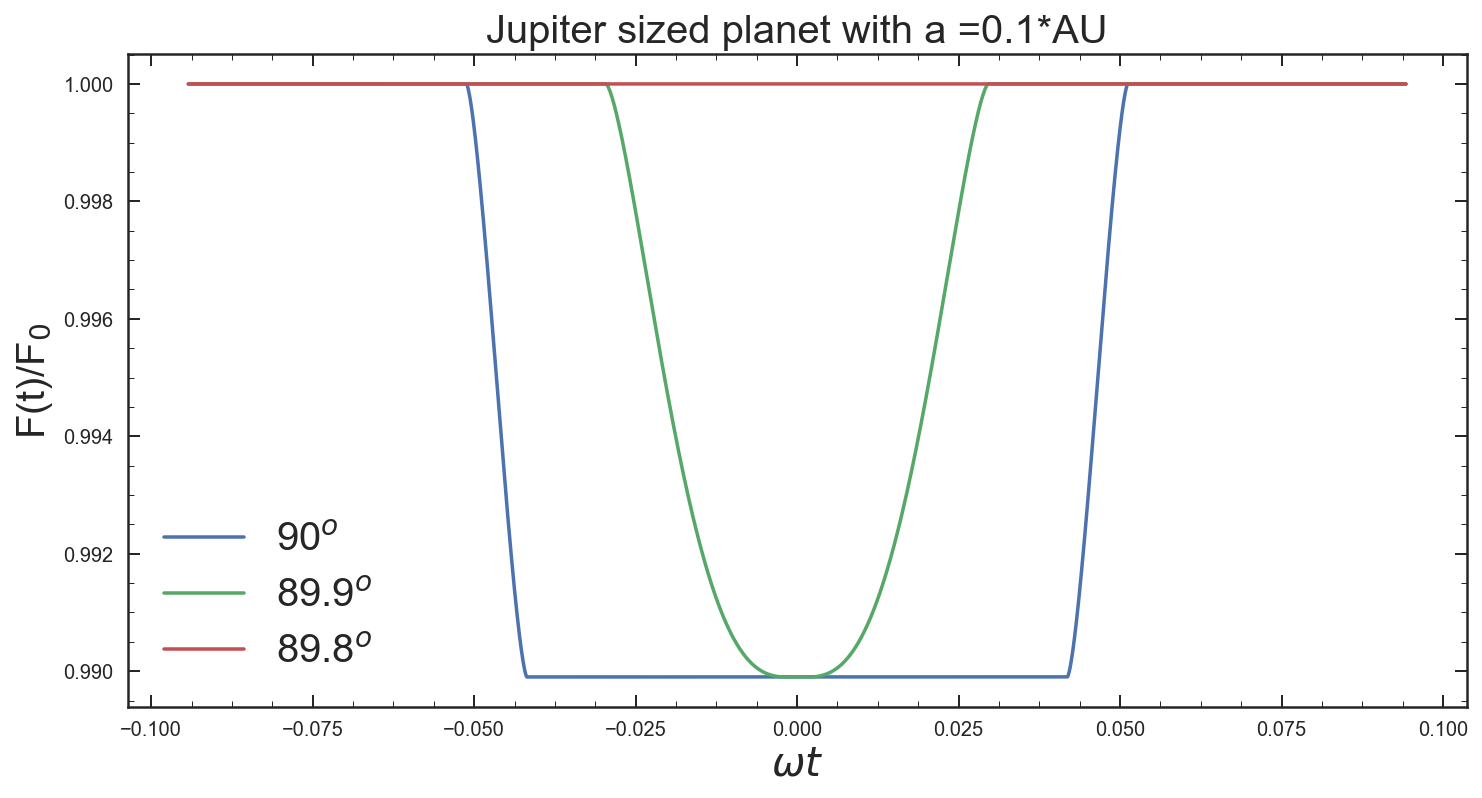

In [97]:
plt.figure(figsize=[12,6])
plt.plot(theta,Relative_flux(r_j,m_j,AU*.1,90.),label = '90$^o$')
plt.plot(theta,Relative_flux(r_j,m_j,AU*.1,89.9),label = '89.9$^o$')
plt.plot(theta,Relative_flux(r_j,m_j,AU*.1,89.8),label = '89.8$^o$')
plt.xlabel('$\omega t$',fontsize=20)
plt.ylabel('F(t)/F$_0$',fontsize=20)
plt.title('Jupiter sized planet with a =0.1*AU',fontsize=20)
plt.legend(fontsize=20)

# #2

Equations of motion:

$u=\frac{1}{r}$

Need to solve:

$\frac{d^2u}{d\theta^2}+u=\frac{1}{L^2u^2} \frac{d\phi}{dr} (\frac{1}{u})$

or 

$\frac{dv}{d\theta} = \frac{1}{L^2u^2} \frac{d\phi}{dr} (\frac{1}{u}) - u\frac{d\theta}{dr} = v $

For a NFW potential, 

$\rho(r) =\frac{\rho_0}{(r/r_0)(1+r/r0)^2} \frac{d\Phi}{dr}(r) = G\frac{M(r)}{r^2} =4 \pi G \rho_0 r_0 \frac{1}{x^2} \left[\ln(1+x)-\frac{x}{1+x}\right], x=r/r_0 $

For Burkest

$\rho(r)=\frac{\rho_b}{(1+r/r_b)(1+r^2/rb^2)} \frac{d\Phi}{dr}(r) = \pi G\rho_b r_b\frac{1}{x^2}\left[2\ln(1+x)-\ln(1+x^2)+2 \tan^{-1}x\right], x=r/r_b$ 

In [170]:
### Arbitarty units

def Plot_orbit(x0,v0,L,t):
    
    def dvNFW(I, dt):
        x, v= I
        xp = 1/x
        inner_term  = (np.log(1.+xp) - (xp/(1.+xp)))/xp**2

        dv=(inner_term / ((L*x)**2))-x
        return [v,dv]
    
    def dvBUR(I, dt):
        x, v = I
        xp = 1/x

        inner_term = 2*np.log(1.+xp) - np.log(1+x**2)+2. * np.arctan(xp)

        dv=(inner_term/((L*x)**2))-x
        return [v,dv]
    
    theta=np.linspace(0,t,100000)
    I =np.array([x0,v0])
    
    orbit_NFW=odeint(dvNFW,I,theta)
    orbit_BUR=odeint(dvBUR,I,theta)

    rad_NFW=1./orbit_NFW[:,0]
    rad_BUR=1./orbit_BUR[:,0]

    x_NFW=rad_NFW*np.cos(theta)
    y_NFW=rad_NFW*np.sin(theta)
    
    x_BUR=rad_BUR*np.cos(theta)
    y_BUR=rad_BUR*np.sin(theta)
    
    gs = GridSpec(1,2,wspace=0)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(gs[0])
    plt.plot(x_NFW,y_NFW)
    plt.title('NFW')
    
    plt.subplot(gs[1])
    plt.plot(x_BUR,y_BUR) 
    plt.yticks([])
    plt.title('Burkest')
    return

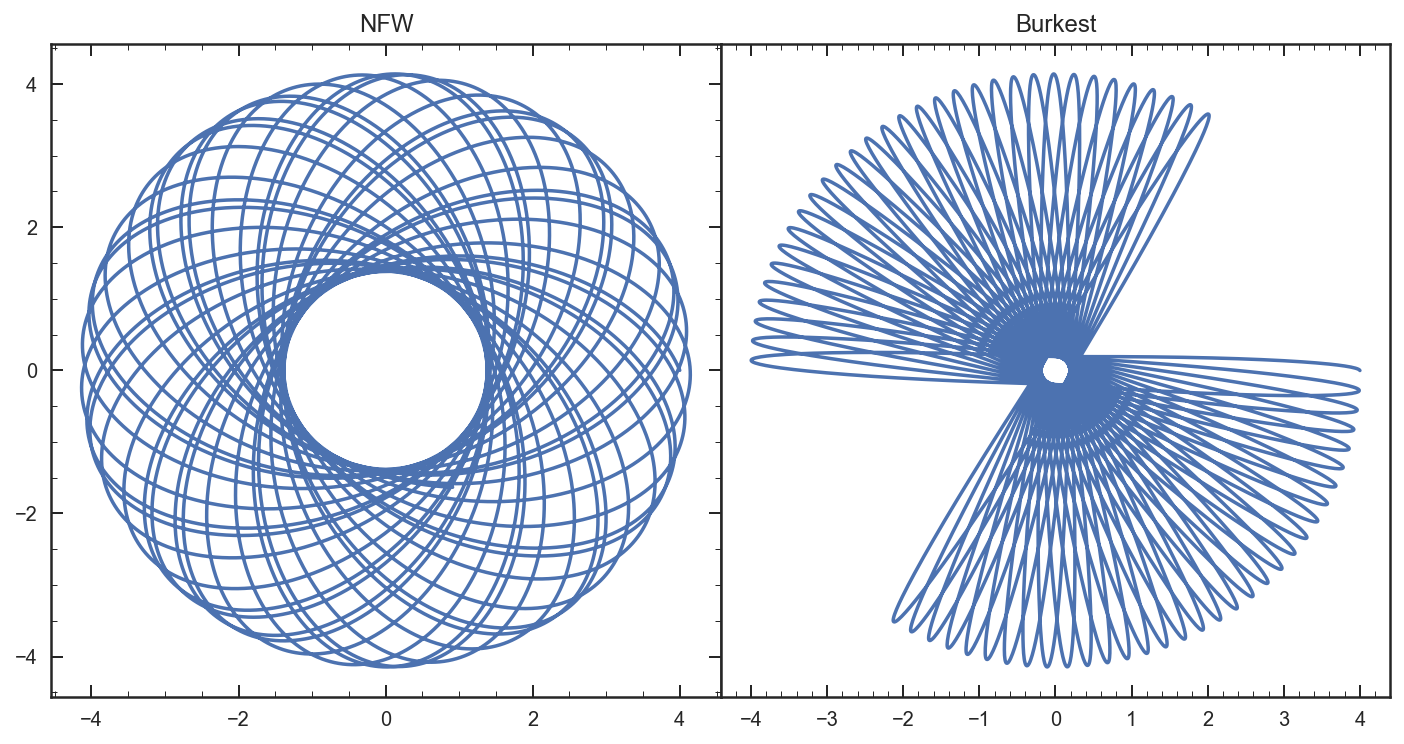

In [171]:
Plot_orbit(.25,.1,1,200)

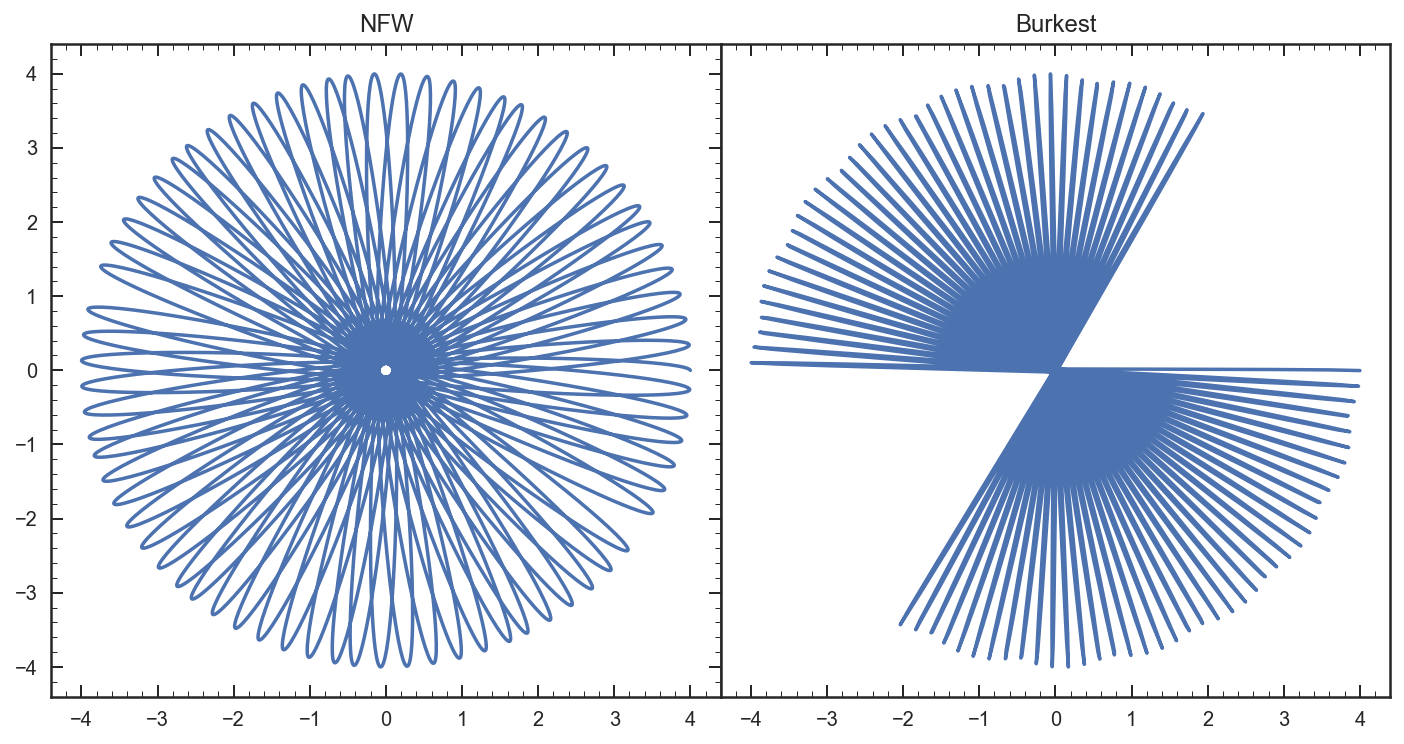

In [172]:
Plot_orbit(.25,.1,.1,250)

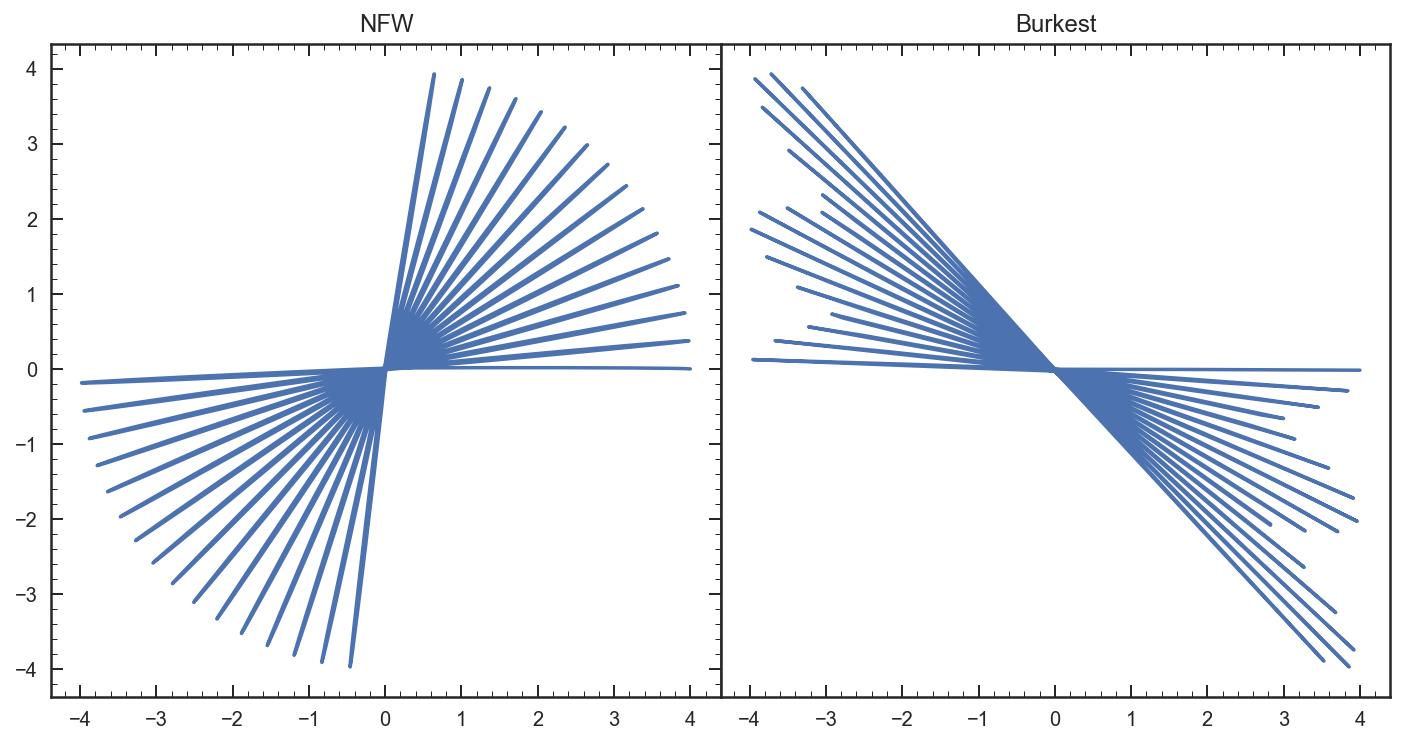

In [173]:
Plot_orbit(.25,.1,.01,100)

It seems as you lower L the orbits begin to enter the center of the galaxy